https://github.com/karpathy/nn-zero-to-hero/tree/master/lectures/micrograd

In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt

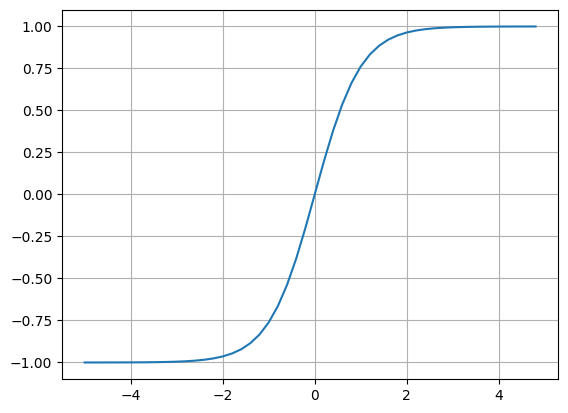

In [9]:
#We have activation function tanh which sqeeze the inputs
plt.plot(np.arange(-5.0,5.0,0.2),np.tanh(np.arange(-5.0,5.0,0.2))); plt.grid() # look at the y axis we have squeezed the -5.0,5.0 to -1.0 to 1.0

In [17]:
class Value:

  def __init__(self,data, _children= (), _op='', label=''): # _op is empty string
    self.data = data
    self.grad = 0.0
    self._prev = set(_children)
    self._op = _op
    self.label =label


  def __repr__(self) -> str:
    return f"value(data = {self.data})"

  def __add__(self,other):
    out = Value(self.data + other.data, (self, other),'+')
    return out

  def __mul__(self,other):
    out = Value(self.data * other.data,(self, other),'*')
    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
    out = Value(t, (self,), 'tanh')
    return out

In [11]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

In [21]:
# inputs : 2 : x1 and x2
x1= Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights: w1, w2
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
# bias of the neuron; b
b = Value(6.877646553542689, label = 'b')
# x1w1 + x2w2
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'


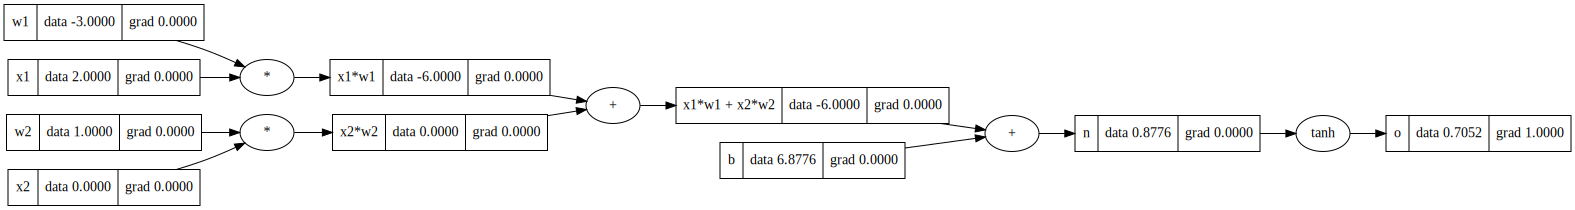

In [24]:
draw_dot(o)

Lets backpropagate

In [ ]:
n.grad = 0.5

In [23]:
o.grad = 1.0

In [26]:
1- o.data**2

0.5026388710808545

In [ ]:
# o = tanh(n)
# do/dn =d/dn(tanh(n)) = 1- tanh**2(n)
# do/dn = 1- o**2


link: https://search.brave.com/images?q=cs231n+neuron&source=web

about hyperbolic functions: https://en.wikipedia.org/wiki/Hyperbolic_functions